In [98]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [99]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [100]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [101]:
table_name = Base.classes.keys()
table_name[0]
inspector = inspect(engine)
columns = inspector.get_columns(table_name[0])
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [102]:
columns = inspector.get_columns(table_name[1])
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [103]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_results = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()


In [104]:
# 2. Convert the June temperatures to a list.
june_list=[june_results]

In [105]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
df=pd.DataFrame (june_results)


In [106]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
df.rename(columns={"tobs":"June_Temps"}, inplace=True)
df.describe()

,June_Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:>

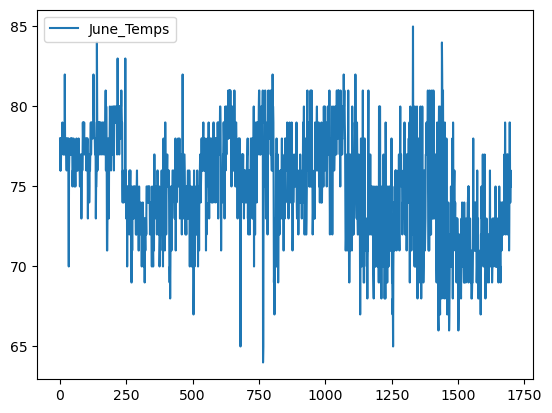

In [107]:
# 5. Return to your challenge instructions to compare your summary statistics
df.plot()

## D2: Determine the Summary Statistics for December

In [108]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").all()

In [109]:
# 7. Convert the December temperatures to a list.
december_list=[december_results]


In [110]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df=pd.DataFrame (december_results)


In [111]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.rename(columns={"tobs":"December_Temps"}, inplace=True)
df.describe()

,December_Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:>

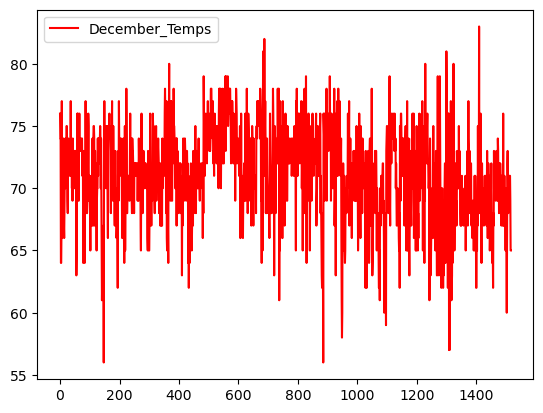

In [112]:
# 10. Return to your challenge instructions to compare your summary statistics
df.plot(color="r")
